# ISYE 6740:  HW3 Q2 Solution

*Spring 2020*

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats as st
import math
from sklearn.neighbors import KernelDensity

## Problem Statement

> The data set `n90pol.csv` contains information on 90 university students who participated in a psychological experiment designed to look for relationships between the size of different regions of the brain and political views. The variables `amygdala` and `acc` indicate the volume of two particular brain regions known to be involved in emotions and decision-making, the amygdala and the anterior cingulate cortex; more exactly, these are residuals from the predicted volume, after adjusting for height, sex, and similar body-type variables. The variable orientation gives the students’ locations on a five-point scale from 1 (very conservative) to 5
(very liberal).

First, we use the `pandas` library to read the dataset:

In [2]:

# read data
data = pd.read_csv("n90pol.csv")

# get the range of data
range_amygdala = [min(data['amygdala']), max(data['amygdala'])]
range_acc = [min(data['acc']), max(data['acc'])]
range_orientation = [min(data['orientation']), max(data['orientation'])]

# get all choices of orientation and separate data
ranges = list(set(data['orientation']))
dataset = []
for i in range(len(ranges)):
    dataset.append(data[data['orientation'] == ranges[i]])

### Part A

> Form 2-dimensional histogram for the pairs of variables (amygdala, acc).  Decide on a suitable number of bins so you can see the shape of the distribution clearly.

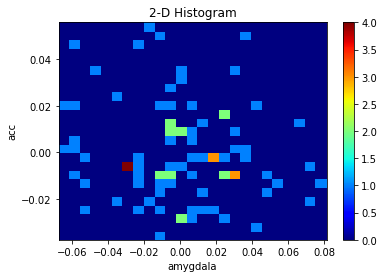

In [3]:
# plot the histogram
x = data['amygdala']
y = data['acc']
plt.hist2d(x, y, bins=(25, 25), cmap=plt.cm.jet)
plt.xlabel("amygdala")
plt.ylabel("acc")
plt.title("2-D Histogram")
plt.colorbar()
plt.show()

### Part B

> Now implement kernel-density-estimation (KDE) to estimate the 2-dimensional with a two-dimensional density function of (amygdala, acc). Use a simple multidimensional Gaussian kernel.  Set an appropriate $h$ so you can see the shape of the distribution clearly. Plot the contour plot (like the ones in slides) for your estimated density.

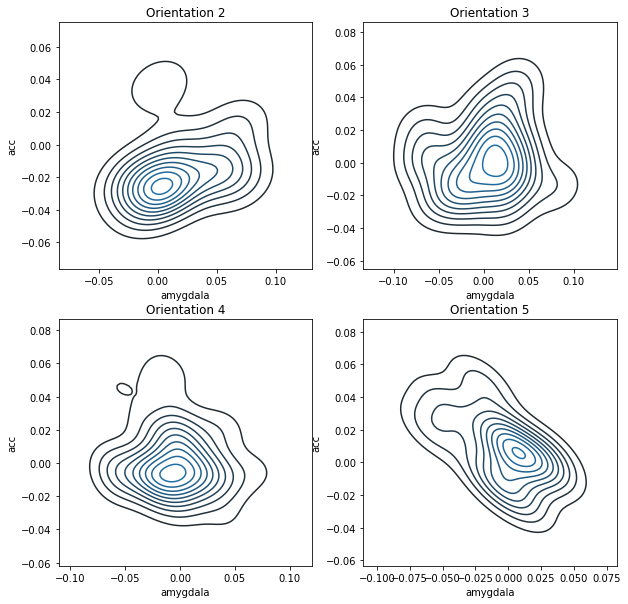

In [4]:
#####################################################
# KDE Contour Plot
col = math.ceil(np.sqrt(len(ranges)))
row = math.ceil(np.sqrt(len(ranges)))
fig ,ax= plt.subplots(figsize = (10,10), ncols = col, nrows = row)
for i in range(len(ranges)):
    ax[int(i/col)][i%col].set_title("Orientation " + str(ranges[i]))
    sns.kdeplot(dataset[i]["amygdala"], dataset[i]["acc"], ax = ax[int(i/col)][i%col])
plt.show()

### Part B (alternative solution)

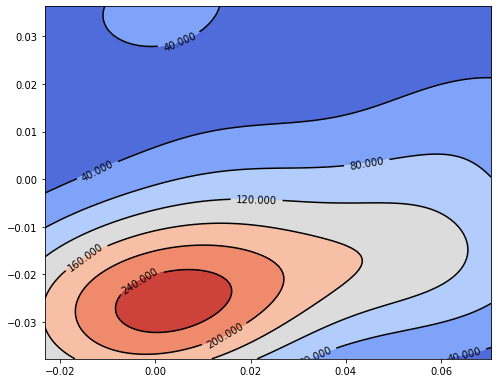

In [5]:
### alternative method to get the plot
### use the equations provided in the problem rather than packages
def gaussian_kernel(x, y):
    return math.exp(-((x**2)+(y**2))/2)/(math.sqrt(2*math.pi))

def kernel_density_estimate(x_i, y_i, x, y, h):
    prob = 0
    m = len(x)
    for i in range(m):
        # x_i and y_i are two dimensional vectors
        # x[i] and y[i] are our data
        prob += gaussian_kernel((x_i-x[i])/h,(y_i-y[i])/h)
    prob /= (m*h)
    return prob
  
def contour_plots(x, y, h):
    # kernel density estimate
    x = np.array(x)
    y = np.array(y)
    xx = np.linspace(min(x), max(x), 100)
    yy = np.linspace(min(y), max(y), 100)
    xxx, yyy = np.meshgrid(xx,yy)
    results = np.zeros((100,100))
    for i in range(100):
        for j in range(100):
            results[i,j] = kernel_density_estimate(xx[i], yy[j], x, y, h)
    
    # plot the contour
    fig = plt.figure()
    ax = fig.gca()
    ax.set_xlim(min(x), max(x))
    ax.set_ylim(min(y), max(y))
    cfset = ax.contourf(xxx, yyy, results, cmap='coolwarm')
    ax.imshow(np.rot90(results), cmap='coolwarm', extent=[min(x), max(x), min(y), max(y)])
    cset = ax.contour(xxx, yyy, results, colors='k')
    ax.clabel(cset, inline=1, fontsize=10)
    ax.set_xlabel('amygdala')
    ax.set_ylabel('acc')
    plt.show()
    return 

h = 0.01 # you can change the value of h to see its influence
# print(kernel_density_estimate(0,0,))
# contour_plots(dataset[0]['amygdala'],dataset[0]['acc'],h)

# third method to plot it just using scipy.stats gaussian_kde
def plotKDE(x, y):
    # kernel density estimate
    xx, yy = np.mgrid[min(x):max(x):100j, min(y):max(y):100j]
    positions = np.vstack([xx.ravel(), yy.ravel()])
    values = np.vstack([x, y])
    kernel = st.gaussian_kde(values)
    f = np.reshape(kernel(positions).T, xx.shape)
    # plot the contour 
    fig = plt.figure(figsize=(8,8))
    ax = fig.gca()
    ax.set_xlim(min(x), max(x))
    ax.set_ylim(min(y), max(y))
    cfset = ax.contourf(xx, yy, f, cmap='coolwarm')
    ax.imshow(np.rot90(f), cmap='coolwarm', extent=[min(x), max(x), min(y), max(y)])
    cset = ax.contour(xx, yy, f, colors='k')
    ax.clabel(cset, inline=1, fontsize=10)
    plt.show()
plotKDE(dataset[0]["amygdala"], dataset[0]["acc"])

### Part C

> Plot the condition distribution of the volume of the amygdala as a function
of political orientation: $p(amygdala|orientation = a)$, for $a = 1,\dots, 5$. Do the same for
the volume of the acc. Plot $p(acc|orientation = a)$ for $a = 1,\dots,5$. You may either use histogram or KDE to achieve the goal.

[0.14444444 0.26666667 0.45555556 0.13333333]


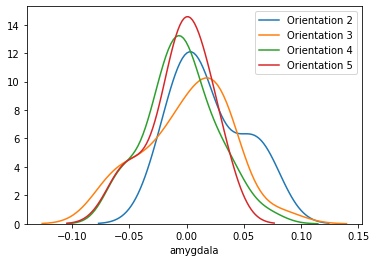

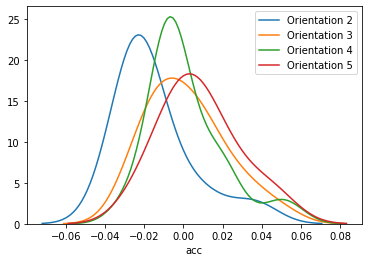

In [6]:
#####################################################
### Conditional probability

# calculate the probability for each orientation
prob_each_ori = np.zeros(4)
for i in range(4):
    prob_each_ori[i] = len(dataset[i])/len(data)
print(prob_each_ori)

# get the conditional probability for amygdala
for i in range(len(ranges)):
    sns.kdeplot(dataset[i]['amygdala'], label = 'Orientation ' + str(ranges[i]))
plt.xlabel("amygdala")
plt.show()

# get the conditional probability for acc
for i in range(len(ranges)):
    sns.kdeplot(dataset[i]['acc'], label = 'Orientation ' + str(ranges[i]))
plt.xlabel("acc")
plt.show()